Download data from [google](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit?usp=sharing) or it's [mirror a](https://s3.amazonaws.com/mordecai-geo/GoogleNews-vectors-negative300.bin.gz)



Make sure you have widget extensions installed:

```jupyter nbextension enable --py --sys-prefix widgetsnbextension```

If you don't have downloaded the data, do it with this cell. If you already have data, then don't bother

In [ ]:
!wget https://s3.amazonaws.com/mordecai-geo/GoogleNews-vectors-negative300.bin.gz

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import gensim
from wordcloud import WordCloud
from ipywidgets import interact

In [3]:
modelName = 'GoogleNews-vectors-negative300.bin'
model = gensim.models.KeyedVectors.load_word2vec_format(modelName, binary=True)
cloud = WordCloud()

In [4]:
def drawWordCloud(seedWord):
    try:
        closestWords = model.most_similar(seedWord, topn=40)
    except:
        closestWords = [ ('?', 1) ]
    closestWords = { k:v for k,v in closestWords }
    cloud_im = cloud.generate_from_frequencies(closestWords)
    plt.imshow(cloud_im)
    plt.axis('off')

In [5]:
def drawAnalogy(a,isTo_x,like,isTo):
    print '%s : ? :: %s : %s'%(a, like, isTo)
    closestWords = model.most_similar(positive=[a,isTo], negative=[like], topn=40)
    closestWords = { k:v for k,v in closestWords }
    cloud_im = cloud.generate_from_frequencies(closestWords)
    plt.imshow(cloud_im)
    plt.axis('off')

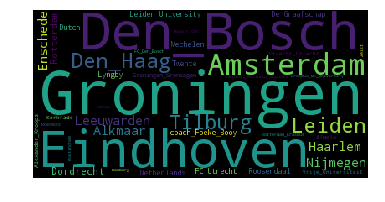

In [6]:
w = interact(drawWordCloud, seedWord='Utrecht')

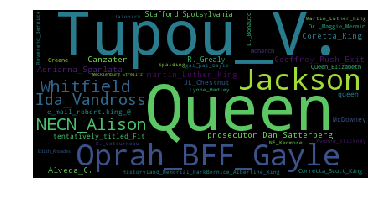

In [7]:
w = interact(drawAnalogy, a='King', isTo_x=True, like='Man', isTo='Woman')